In [1]:
from Funcs.Utility import *

In [2]:
p = os.path.join(PATH_INTERMEDIATE, 'stress_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [3]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [4]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [5]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [6]:
unique_parts = set()
for col in cn:
    part = col.split('#')[0]  # Get the part before the first '#'
    unique_parts.add(part)

# Print the unique parts
print(unique_parts)

{'DATA_SNT', 'DATA_RCV', 'SCR_DUR', 'BAT_LEV', 'MSG_ALL', 'MSG_SNT', 'DATA_MRCV', 'SCR_EVENT', 'Notification_VIS', 'CALL_CNT', 'Notification_CAT', 'BAT_STA', 'MSG_RCV', 'Dozemode', 'PWR', 'Time', 'APP_CAT', 'CALL_DUR', 'BT_BondState', 'PIF', 'DATA_MSNT', 'CHG', 'BAT_PLG', 'LOC_LABEL', 'BT_classType', 'BAT_TMP', 'INST_JAC', 'Sleep', 'BT_DeviceType', 'APP_DUR_UNKNOWN', 'RING'}


In [9]:
import pandas as pd

# Assuming X is your DataFrame

# List of prefixes to filter
prefixes = ['SCR', 'PWR', 'CHG', 'BAT', 'LOC']

# Filter columns based on the prefixes
filtered_columns = [col for col in X.columns if any(col.startswith(prefix) for prefix in prefixes)]

# Create a new DataFrame with the filtered columns
filtered_df = X[filtered_columns]

X = filtered_df

In [11]:
cn = X.columns.tolist()
print(cn)

['BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'PWR#DSC', 'PWR#DSC=ACTIVATE', 'PWR#DSC=DEACTIVATE', 'BAT_LEV#VAL', 'BAT_STA#VAL=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_TMP#VAL', 'BAT_PLG#VAL=UNDEFINEDACUSBWIRELESS', 'LOC_LABEL#VAL=noneworkhome', 'SCR_EVENT#VAL=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'SCR_DUR#VAL', 'CHG#VAL=DISCONNECTED', 'CHG#VAL=CONNECTED', 'PWR#VAL=ACTIVATE', 'PWR#VAL=DEACTIVATE', 'BAT_LEV#AVG#ImmediatePast_15', 'BAT_LEV#STD#ImmediatePast_15', 'BAT_LEV#SKW#ImmediatePast_15', 'BAT_LEV#KUR#ImmediatePast_15', 'BAT_LEV#ASC#ImmediatePast_15', 'BAT_LEV#BEP#ImmediatePast_15', 'BAT_LEV#MED#ImmediatePast_15', 'BAT_LEV#TSC#ImmediatePast_15', 'BAT_STA#ETP##ImmediatePast_15', 'BAT_STA#ASC##ImmediatePast_15', 'BAT_STA#RLV_SUP=DISCHARGINGCHARGING

In [12]:
X = X[[col for col in X.columns if not col.endswith('#ImmediatePast_15')]]

In [13]:
cn = X.columns.tolist()
print(cn)

['BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'PWR#DSC', 'PWR#DSC=ACTIVATE', 'PWR#DSC=DEACTIVATE', 'BAT_LEV#VAL', 'BAT_STA#VAL=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_TMP#VAL', 'BAT_PLG#VAL=UNDEFINEDACUSBWIRELESS', 'LOC_LABEL#VAL=noneworkhome', 'SCR_EVENT#VAL=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'SCR_DUR#VAL', 'CHG#VAL=DISCONNECTED', 'CHG#VAL=CONNECTED', 'PWR#VAL=ACTIVATE', 'PWR#VAL=DEACTIVATE']


/tmp/ipykernel_81122/4065439114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User_ID'] = groups  # Assign user IDs to the feature set


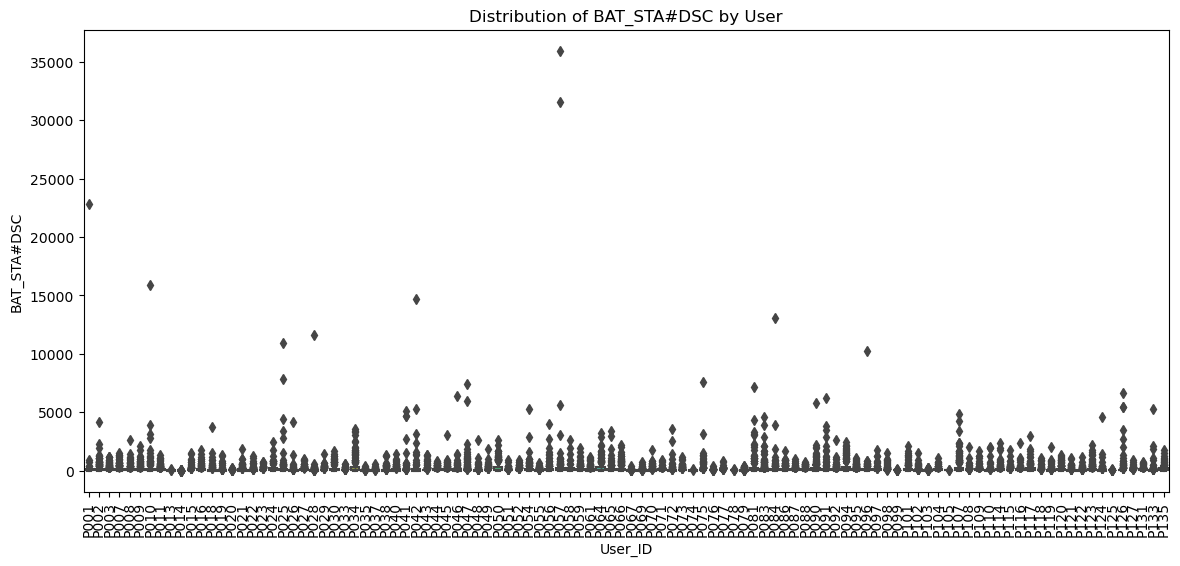

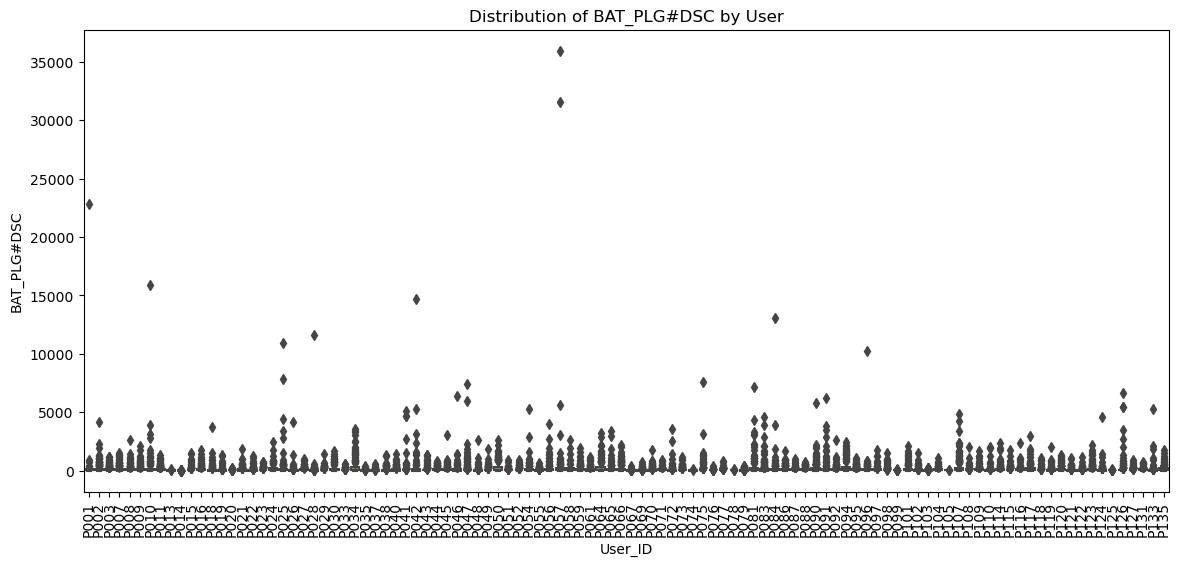

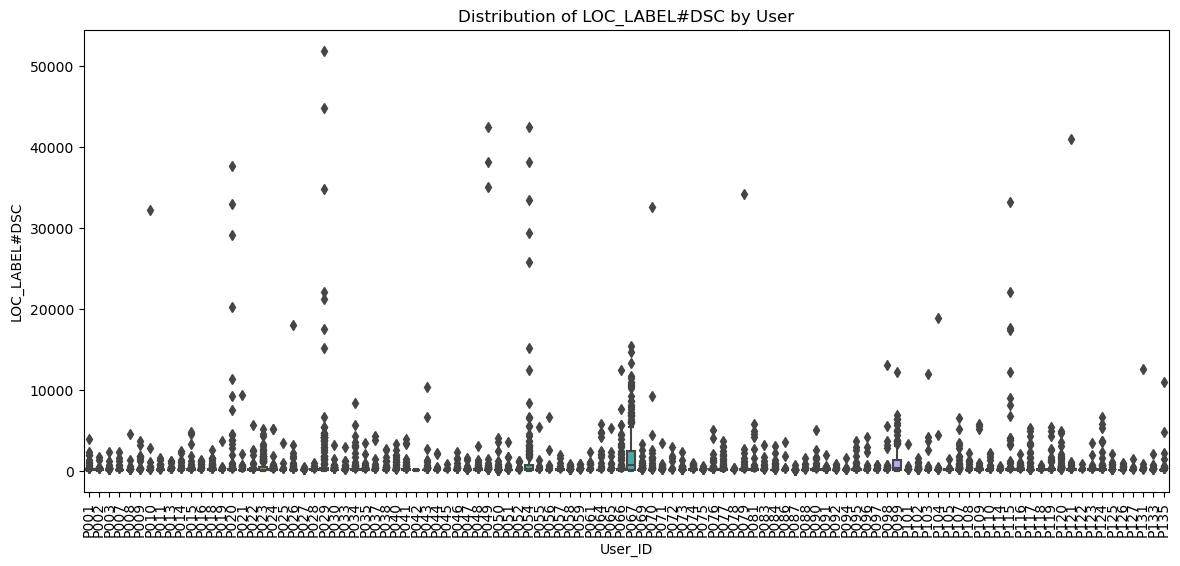

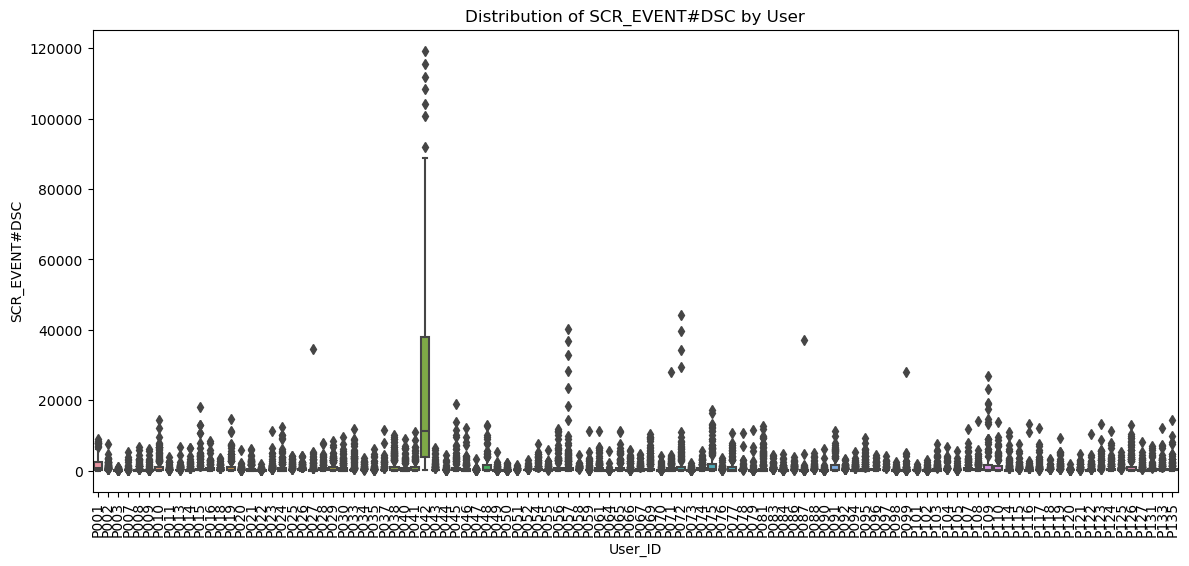

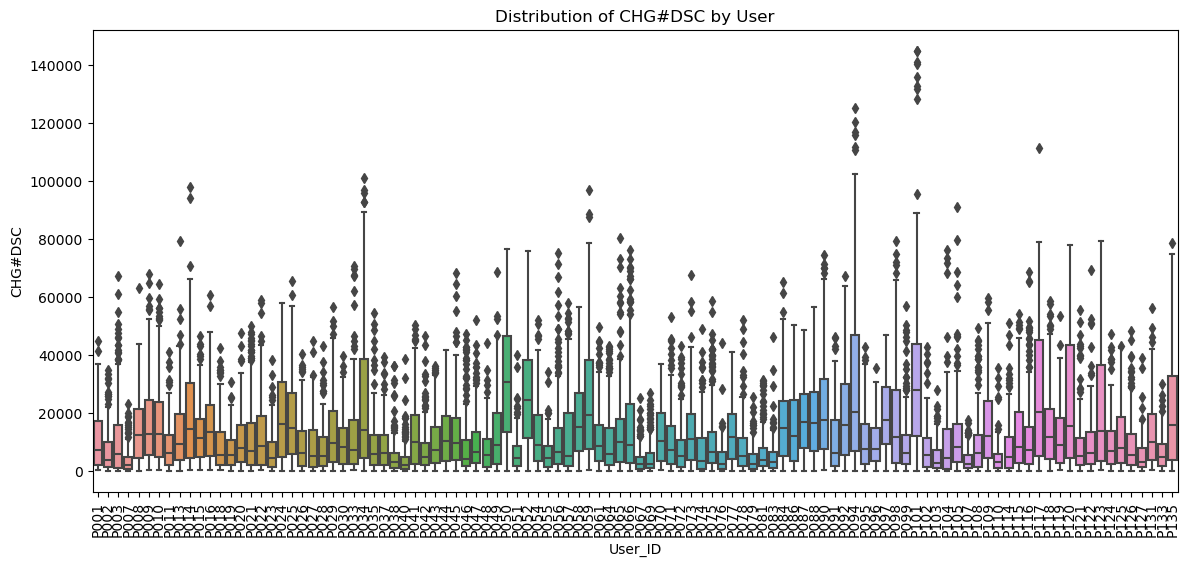

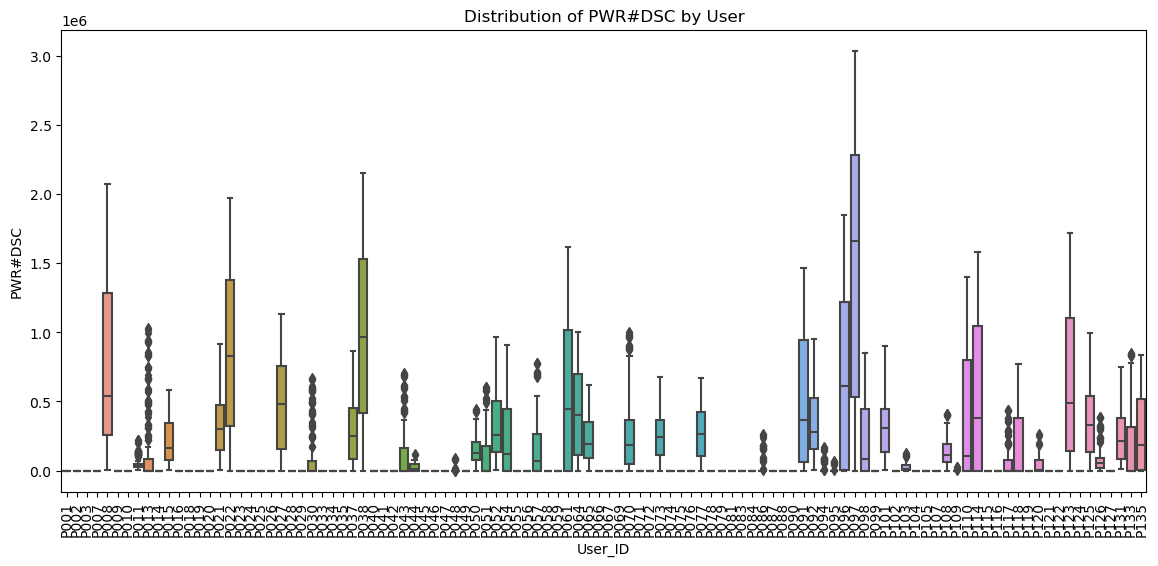

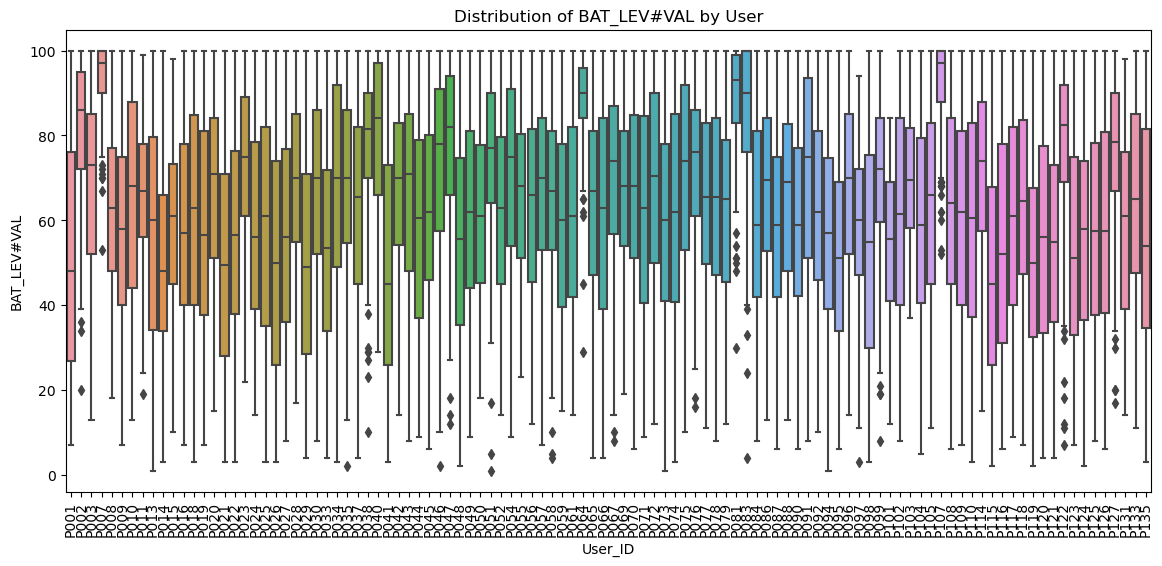

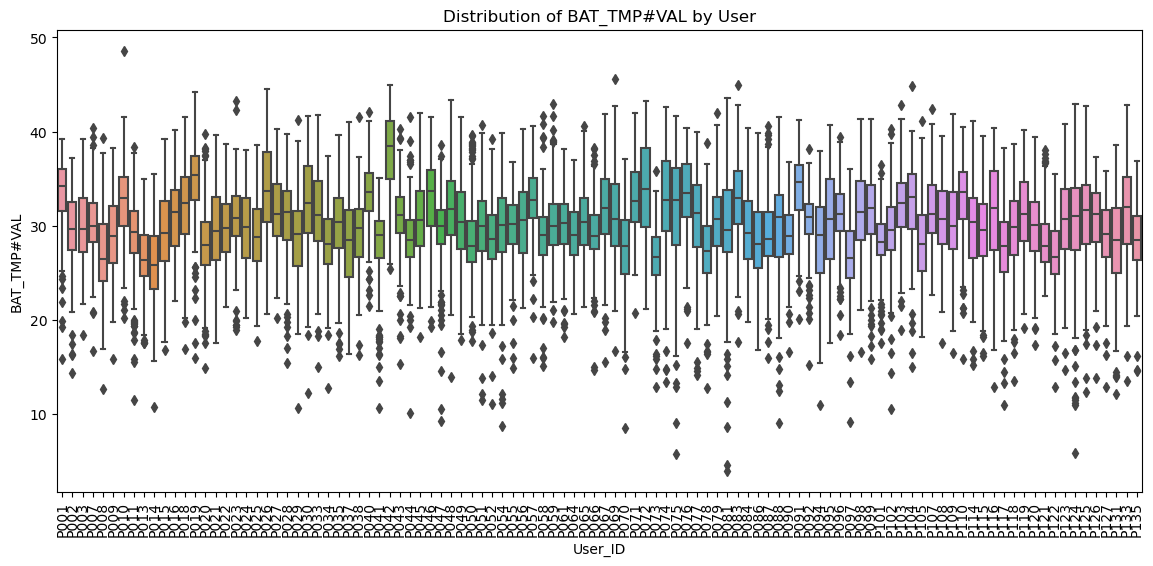

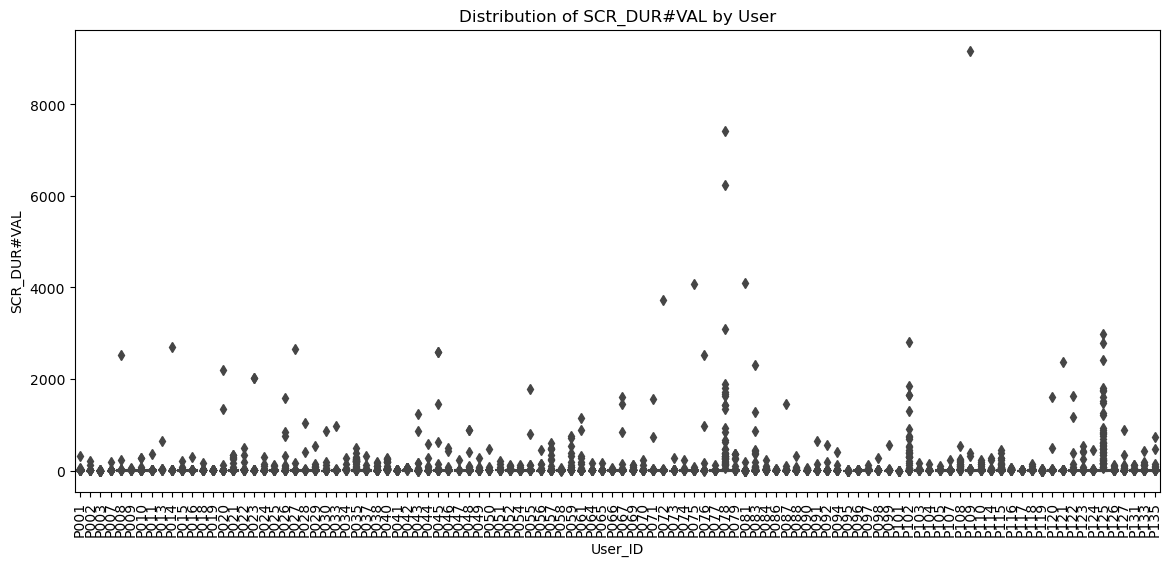

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is a DataFrame
X['User_ID'] = groups  # Assign user IDs to the feature set

# List of features to analyze 
features = ['BAT_STA#DSC', 'BAT_PLG#DSC', 'LOC_LABEL#DSC', 'SCR_EVENT#DSC', 'CHG#DSC', 
            'PWR#DSC', 'BAT_LEV#VAL', 'BAT_TMP#VAL', 'SCR_DUR#VAL']

# Plotting the distribution of each feature for each user
for feature in features:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='User_ID', y=feature, data=X)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} by User')
    plt.show()

/tmp/ipykernel_81122/711293631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = datetimes  # Assign timestamps to the feature set


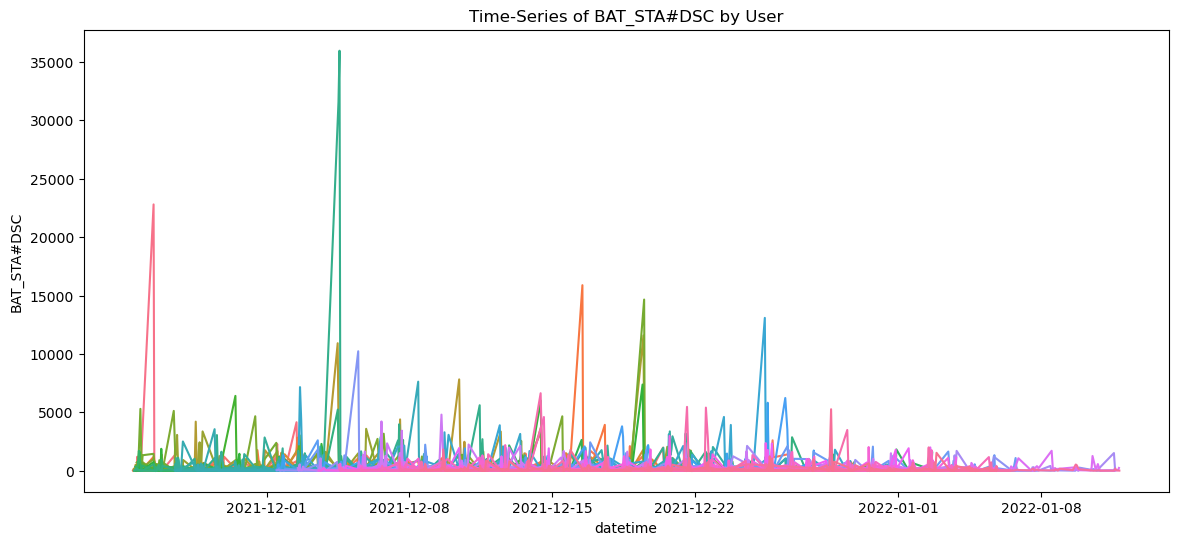

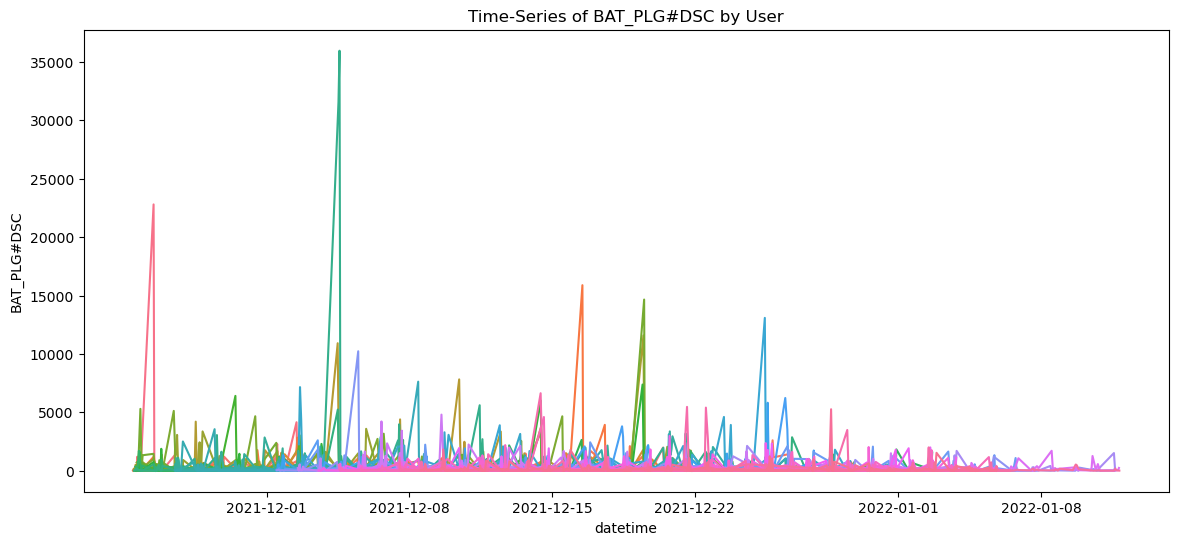

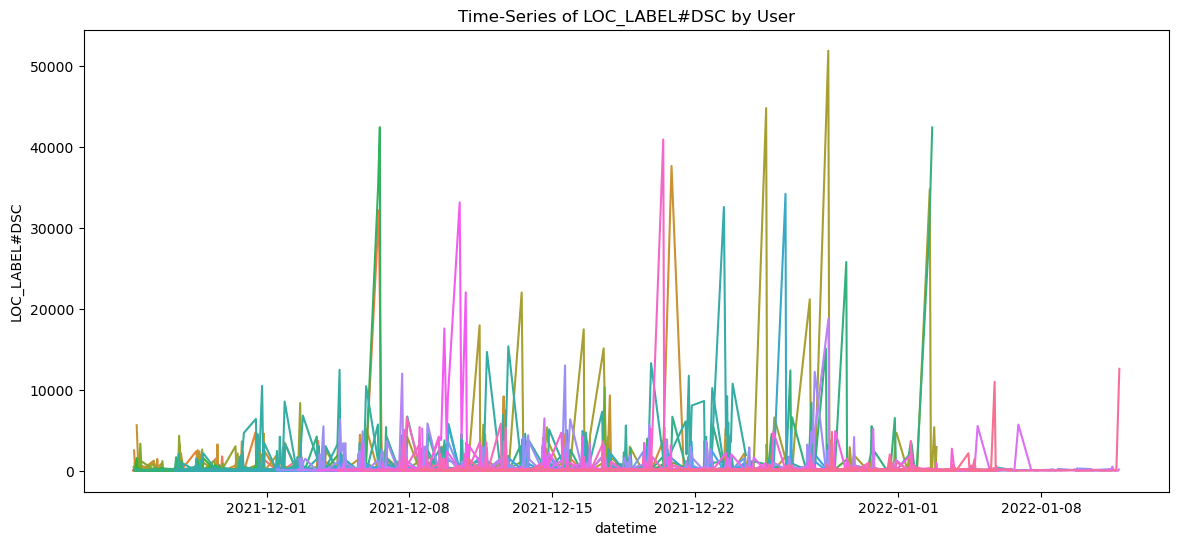

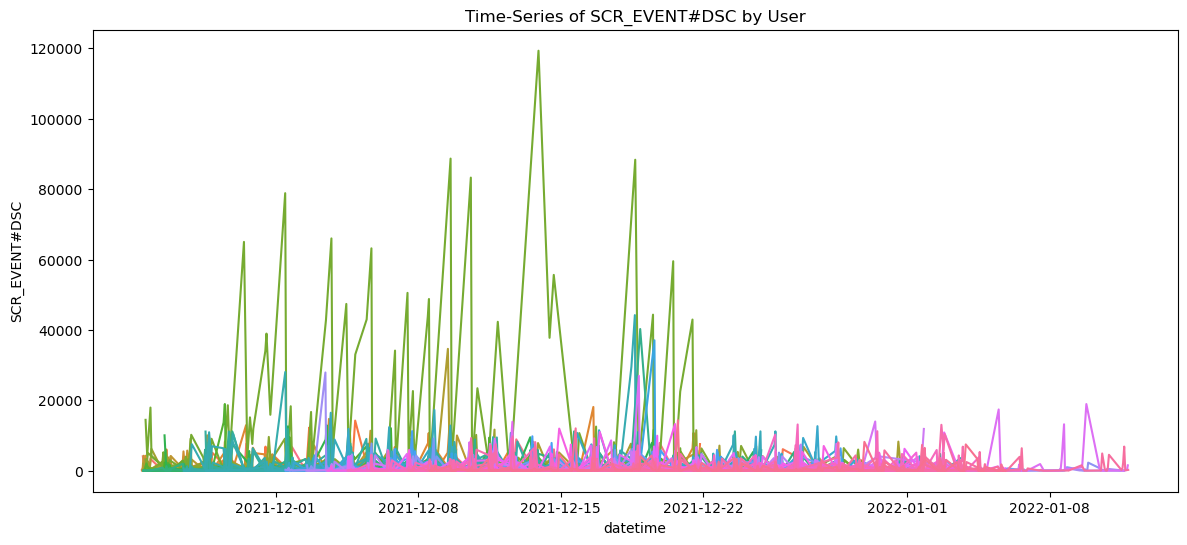

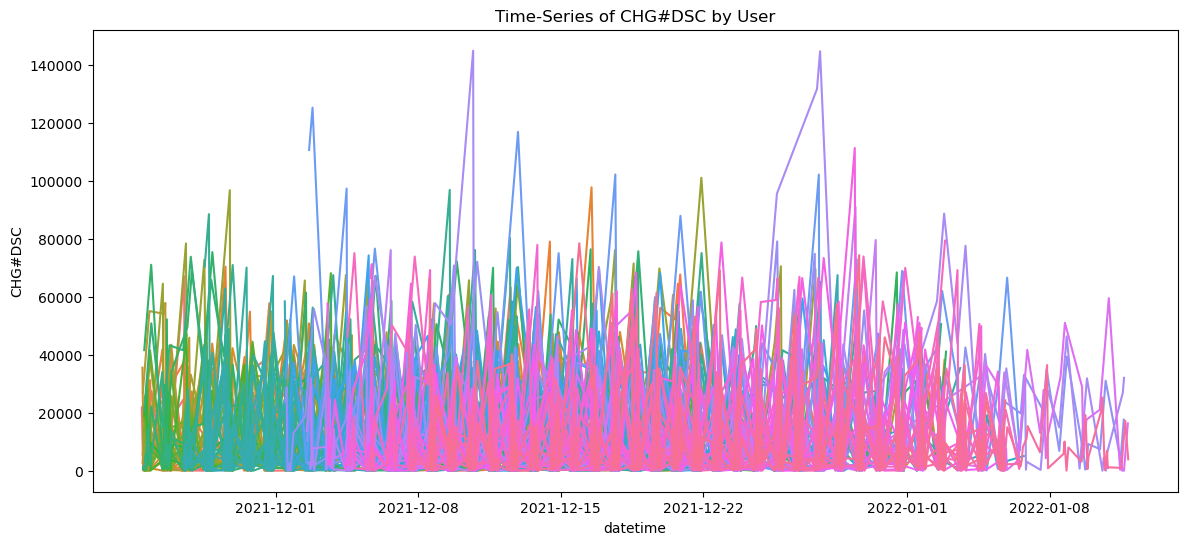

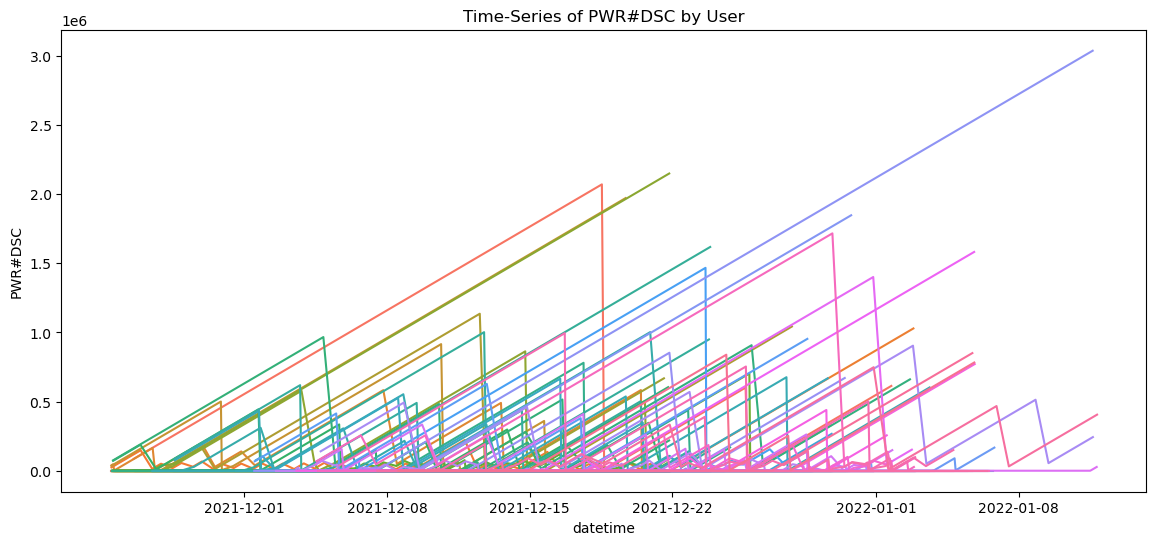

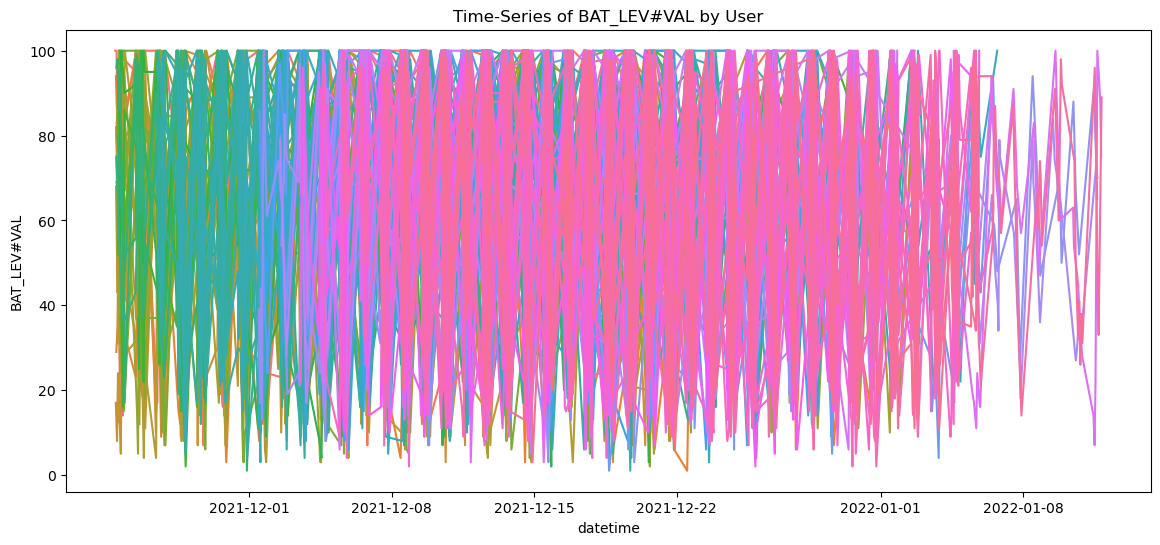

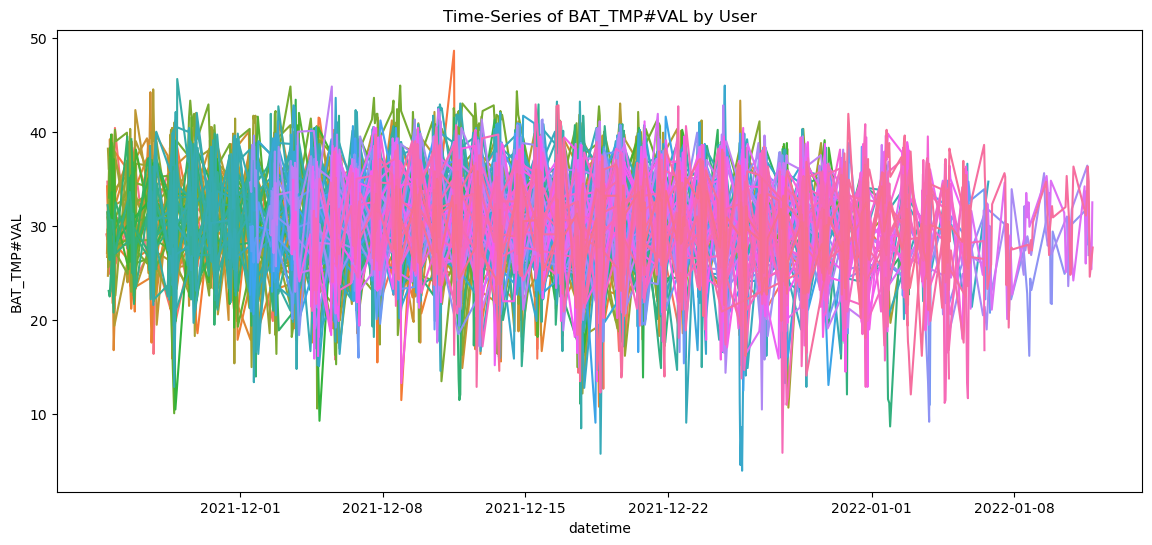

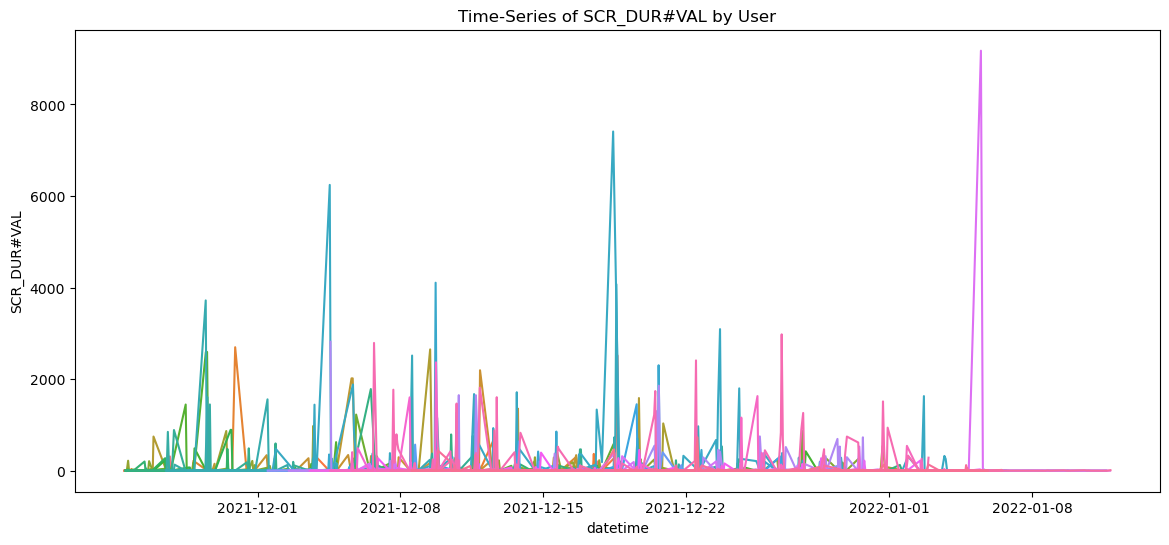

In [15]:
X['datetime'] = datetimes  # Assign timestamps to the feature set

# Plotting time-series data for each feature by User
for feature in features:
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='datetime', y=feature, hue='User_ID', data=X, legend=False)
    plt.title(f'Time-Series of {feature} by User')
    plt.show()
